In [1]:
import qutip as qp
import numpy as np
import matplotlib.pyplot as plt
import H_generator
from GFE import GFE_circuit

In [2]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# Random initial state

## Set parameters and initialize

In [3]:
QC = GFE_circuit()

# Hamiltonian and initial state construction
N = 8
J = 1
g = 2
shift_E = 15
H = H_generator.build_Ising_model(N, J, g, shift_E)
QC.set_Hamiltonian(H)
h_list = H_generator.Ising_model_decomposition(N, J, g, shift_E)

# Prepare a random initial state
QC.gen_rand_initial_state(h_list, N)
qp.fileio.qsave(QC.ini_state, './data/rand_ini_state_for_direct_simulation') # save it

# load the random initial state
ini_state = qp.fileio.qload('./data/rand_ini_state_for_direct_simulation')
QC.set_initial_state(ini_state)

dy, My = 0.16, 50 # discrete parameters
QC.set_discrete_parameters(dy, My)

Loaded Qobj object:
Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1]], shape = (256, 1), type = ket



In [4]:
E_exact = H.eigenenergies()[0] # exact ground state energy of H

In [5]:
# Compute the state overlap.
num_list, den_list = QC.directly_compute_overlaps()

## Fixing sigma and scanning mu

Here we solv the estimated energy as a function of $\mu$ while fixing the $1/\sigma^{2}$. As the state overlap only depends on the discrete parameters, we can only compute it once and estimate several approximate energy corresponding to different Gaussian parameters by adopting different weights.

In [6]:
# Three fixed sigma square value
sig_squ_1 = 1
sig_squ_2 = 1/1.5
sig_squ_3 = 1/2

# The estimatation energy list corresponding to the given sigma square
E_est_list_sig_1 = []
E_est_list_sig_2 = []
E_est_list_sig_3 = []

mu_list = np.linspace(-6, 0, 30) # mu list to scan

for mu in mu_list:
    QC.set_Gaussian_parameters(sig_squ_1, mu)
    by_list_1 = QC.generate_coefficient()
    E_est_1 = QC.compute_E(by_list_1, num_list, den_list)
    E_est_list_sig_1.append(E_est_1)
    
    QC.set_Gaussian_parameters(sig_squ_2, mu)
    by_list_2 = QC.generate_coefficient()
    E_est_2 = QC.compute_E(by_list_2, num_list, den_list)
    E_est_list_sig_2.append(E_est_2)
    
    QC.set_Gaussian_parameters(sig_squ_3, mu)
    by_list_3 = QC.generate_coefficient()
    E_est_3 = QC.compute_E(by_list_3, num_list, den_list)
    E_est_list_sig_3.append(E_est_3)

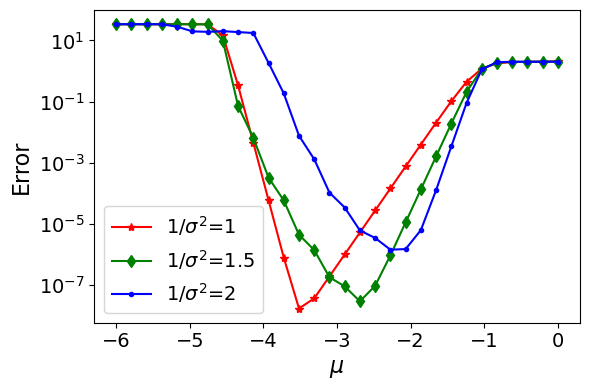

In [7]:
fig = plt.figure(figsize = [6, 4])
plt.plot(mu_list, E_est_list_sig_1 - E_exact, 'r*-', label="$1/\sigma^{2}$=1")
plt.plot(mu_list, E_est_list_sig_2 - E_exact, 'gd-', label="$1/\sigma^{2}$=1.5")
plt.plot(mu_list, E_est_list_sig_3 - E_exact, 'b.-', label="$1/\sigma^{2}$=2")

plt.yscale('log')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.xlabel('$\mu$',fontsize=16)
plt.ylabel('Error',fontsize=16)

plt.tight_layout()
plt.show()

## Fixing mu and scanning sigma square

Here we solv the estimated energy as a function of $1/\sigma^{2}$ while fixing the $\mu$. As the state overlap only depends on the discrete parameters, we can only compute it once and estimate several approximate energy corresponding to different Gaussian parameters by adopting different weights.

In [8]:
# Three fixed mu value
mu_1 = -2
mu_2 = -3
mu_3 = -4

# The estimatation energy list corresponding to the given mu
E_est_list_mu_1 = []
E_est_list_mu_2 = []
E_est_list_mu_3 = []

inv_sig_squ_list = np.linspace(0, 4, 30)
sig_squ_list = 1/inv_sig_squ_list # sigma square list to scan
for sig_squ in sig_squ_list:
    QC.set_Gaussian_parameters(sig_squ, mu_1)
    by_list_1 = QC.generate_coefficient()
    E_est_1 = QC.compute_E(by_list_1, num_list, den_list)
    E_est_list_mu_1.append(E_est_1)
    
    QC.set_Gaussian_parameters(sig_squ, mu_2)
    by_list_2 = QC.generate_coefficient()
    E_est_2 = QC.compute_E(by_list_2, num_list, den_list)
    E_est_list_mu_2.append(E_est_2)
    
    QC.set_Gaussian_parameters(sig_squ, mu_3)
    by_list_3 = QC.generate_coefficient()
    E_est_3 = QC.compute_E(by_list_3, num_list, den_list)
    E_est_list_mu_3.append(E_est_3)

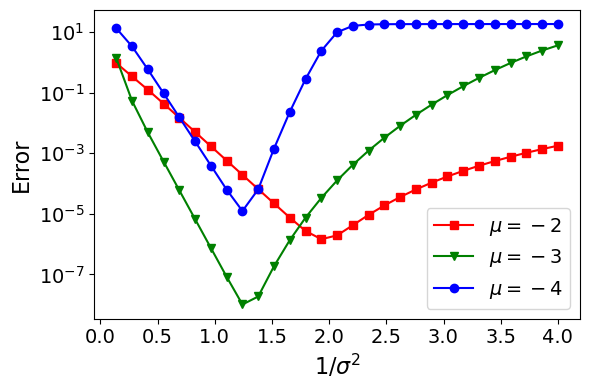

In [9]:
fig = plt.figure(figsize = [6, 4])
plt.plot(inv_sig_squ_list, E_est_list_mu_1 - E_exact, 'rs-', label="$\mu=-2$")
plt.plot(inv_sig_squ_list, E_est_list_mu_2 - E_exact, 'gv-', label="$\mu=-3$")
plt.plot(inv_sig_squ_list, E_est_list_mu_3 - E_exact, 'bo-', label="$\mu=-4$")

plt.yscale('log')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.xlabel('$1/\sigma^{2}$',fontsize=16)
plt.ylabel('Error',fontsize=16)

plt.tight_layout()
plt.show()

# Well-prepared initila state
In above procedure, we adopt a random generalized initial state. If we can prepare the initial state with the knowledge of the Hamiltonian, the result may be better. For example, in this demonstration, the $\sum_{n} \sigma^{x}_{n}$ term is the leading term. We may prepare an initial state that is the eigenstate of $\sum_{n} \sigma^{x}_{n}$ by applying a Hadmadard gate and sigima Z on each qubit.

## Set parameters and initialize

In [10]:
QC = GFE_circuit()

# Hamiltonian and initial state construction
N = 8
J = 1
g = 2
shift_E = 15
H = H_generator.build_Ising_model(N, J, g, shift_E)
# This initial state is suitable for Ising model after phase transation
ini_state = qp.tensor([qp.sigmaz()*qp.snot()*qp.basis(2)]*N)
QC.set_Hamiltonian(H)
QC.set_initial_state(ini_state)

dy, My = 0.16, 50 # discrete parameters
QC.set_discrete_parameters(dy, My)

In [11]:
E_exact = H.eigenenergies()[0] # exact ground state energy of H

In [12]:
# Compute the state overlap.
num_list, den_list = QC.directly_compute_overlaps()

## Fixing sigma and scanning mu

Here we solv the estimated energy as a function of $\mu$ while fixing the $1/\sigma^{2}$. As the state overlap only depends on the discrete parameters, we can only compute it once and estimate several approximate energy corresponding to different Gaussian parameters by adopting different weights.

In [13]:
# Three fixed sigma square value
sig_squ_1 = 1
sig_squ_2 = 1/1.5
sig_squ_3 = 1/2

# The estimatation energy list corresponding to the given sigma square
E_est_list_sig_1 = []
E_est_list_sig_2 = []
E_est_list_sig_3 = []

mu_list = np.linspace(-6, 0, 30) # mu list to scan

for mu in mu_list:
    QC.set_Gaussian_parameters(sig_squ_1, mu)
    by_list_1 = QC.generate_coefficient()
    E_est_1 = QC.compute_E(by_list_1, num_list, den_list)
    E_est_list_sig_1.append(E_est_1)
    
    QC.set_Gaussian_parameters(sig_squ_2, mu)
    by_list_2 = QC.generate_coefficient()
    E_est_2 = QC.compute_E(by_list_2, num_list, den_list)
    E_est_list_sig_2.append(E_est_2)
    
    QC.set_Gaussian_parameters(sig_squ_3, mu)
    by_list_3 = QC.generate_coefficient()
    E_est_3 = QC.compute_E(by_list_3, num_list, den_list)
    E_est_list_sig_3.append(E_est_3)

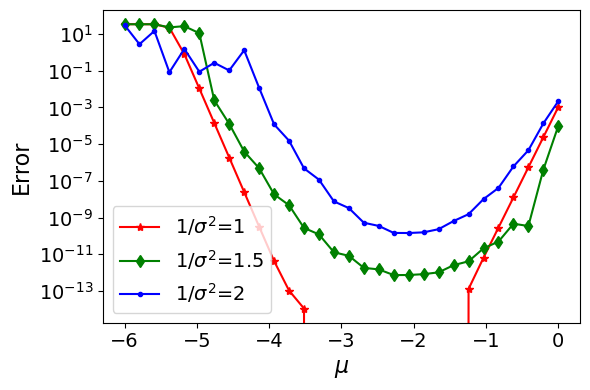

In [14]:
fig = plt.figure(figsize = [6, 4])
plt.plot(mu_list, E_est_list_sig_1 - E_exact, 'r*-', label="$1/\sigma^{2}$=1")
plt.plot(mu_list, E_est_list_sig_2 - E_exact, 'gd-', label="$1/\sigma^{2}$=1.5")
plt.plot(mu_list, E_est_list_sig_3 - E_exact, 'b.-', label="$1/\sigma^{2}$=2")

plt.yscale('log')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.xlabel('$\mu$',fontsize=16)
plt.ylabel('Error',fontsize=16)

plt.tight_layout()
plt.show()

## Fixing mu and scanning sigma square

Here we solv the estimated energy as a function of $1/\sigma^{2}$ while fixing the $\mu$. As the state overlap only depends on the discrete parameters, we can only compute it once and estimate several approximate energy corresponding to different Gaussian parameters by adopting different weights.

In [15]:
# Three fixed mu value
mu_1 = -2
mu_2 = -3
mu_3 = -4

# The estimatation energy list corresponding to the given mu
E_est_list_mu_1 = []
E_est_list_mu_2 = []
E_est_list_mu_3 = []

inv_sig_squ_list = np.linspace(0, 4, 30)
sig_squ_list = 1/inv_sig_squ_list # sigma square list to scan
for sig_squ in sig_squ_list:
    QC.set_Gaussian_parameters(sig_squ, mu_1)
    by_list_1 = QC.generate_coefficient()
    E_est_1 = QC.compute_E(by_list_1, num_list, den_list)
    E_est_list_mu_1.append(E_est_1)
    
    QC.set_Gaussian_parameters(sig_squ, mu_2)
    by_list_2 = QC.generate_coefficient()
    E_est_2 = QC.compute_E(by_list_2, num_list, den_list)
    E_est_list_mu_2.append(E_est_2)
    
    QC.set_Gaussian_parameters(sig_squ, mu_3)
    by_list_3 = QC.generate_coefficient()
    E_est_3 = QC.compute_E(by_list_3, num_list, den_list)
    E_est_list_mu_3.append(E_est_3)

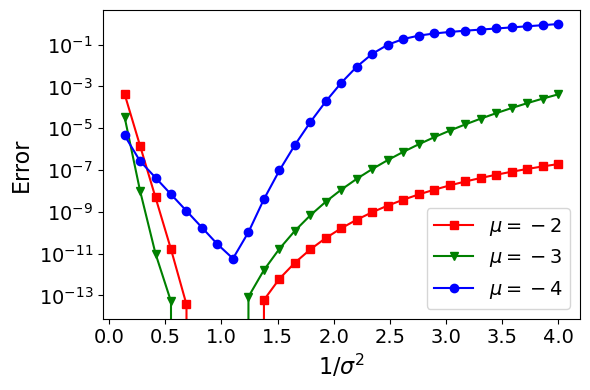

In [16]:
fig = plt.figure(figsize = [6, 4])
plt.plot(inv_sig_squ_list, E_est_list_mu_1 - E_exact, 'rs-', label="$\mu=-2$")
plt.plot(inv_sig_squ_list, E_est_list_mu_2 - E_exact, 'gv-', label="$\mu=-3$")
plt.plot(inv_sig_squ_list, E_est_list_mu_3 - E_exact, 'bo-', label="$\mu=-4$")

plt.yscale('log')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.xlabel('$1/\sigma^{2}$',fontsize=16)
plt.ylabel('Error',fontsize=16)

plt.tight_layout()
plt.show()

## Minues data
Some estimated energy is smaller than the exact one. It may be caused by numerical error. We show the minus data still has a small error.

In [17]:
E_est_list_sig_1 - E_exact

array([ 3.40362853e+01+1.79529197e-06j,  3.40331839e+01+6.16547284e-06j,
        3.37924453e+01+2.18611503e-05j,  2.19783661e+01+3.72191823e-05j,
        7.97934761e-01+1.68872536e-06j,  1.07411451e-02+1.29988663e-07j,
        1.41287316e-04+1.24151355e-08j,  1.85799680e-06+1.40551122e-09j,
        2.44153959e-08+1.90461689e-10j,  3.19886784e-10+3.09658043e-11j,
        4.26503277e-12+6.02287842e-12j,  1.05249143e-13+1.37618392e-12j,
        1.11022302e-14+3.67163287e-13j, -7.10542736e-15+1.12897253e-13j,
       -1.33226763e-14+4.15635895e-14j, -1.59872116e-14+1.81870956e-14j,
       -1.64313008e-14+9.33314565e-15j, -1.73194792e-14+5.76476325e-15j,
       -1.68753900e-14+4.13009442e-15j, -1.68753900e-14+3.49082533e-15j,
       -1.64313008e-14+3.46794698e-15j, -1.64313008e-14+4.34489821e-15j,
       -1.24344979e-14+6.39908146e-15j,  1.28785871e-13+1.15844185e-14j,
        6.47082388e-12+2.43888806e-14j,  2.84473778e-10+6.19478679e-14j,
        1.24548842e-08+1.85987985e-13j,  5.46234189

In [18]:
E_est_list_mu_1 - E_exact

array([            nan           +nanj,  4.49634283e-04+9.86621335e-15j,
        1.48633452e-06+6.88529620e-15j,  4.91423346e-09+5.59376691e-15j,
        1.62314606e-11+4.71527337e-15j,  3.68594044e-14+4.37129807e-15j,
       -1.68753900e-14+3.84570022e-15j, -1.68753900e-14+3.61483971e-15j,
       -1.64313008e-14+3.27856624e-15j, -1.06581410e-14+3.11235664e-15j,
        6.08402217e-14+2.84361004e-15j,  6.29718500e-13+2.67669889e-15j,
        3.69526632e-12+2.64046719e-15j,  1.61319846e-11+2.52039771e-15j,
        5.65028024e-11+2.44232504e-15j,  1.66304748e-10+2.33319457e-15j,
        4.25313118e-10+2.29076745e-15j,  9.69318847e-10+2.13652450e-15j,
        2.00764561e-09+2.11616691e-15j,  3.83762577e-09+2.04720151e-15j,
        6.85383483e-09+1.94536823e-15j,  1.15507790e-08+1.96355001e-15j,
        1.85188243e-08+1.85985379e-15j,  2.84340294e-08+1.79427992e-15j,
        4.20431467e-08+1.71266220e-15j,  6.01453265e-08+1.75684279e-15j,
        8.35721341e-08+1.70102168e-15j,  1.13167295

In [19]:
E_est_list_mu_2 - E_exact

array([            nan           +nanj,  3.62455743e-05+1.33022561e-14j,
        1.04527929e-08+1.23259978e-14j,  1.00377484e-11+1.34617724e-14j,
        5.15143483e-14+1.50522040e-14j, -1.50990331e-14+1.78020642e-14j,
       -1.50990331e-14+2.14132339e-14j, -1.46549439e-14+2.56715506e-14j,
       -1.06581410e-14+3.13906222e-14j,  8.65973959e-14+3.91017144e-14j,
        1.64668279e-12+4.79676958e-14j,  1.71591630e-11+5.90396055e-14j,
        1.24742439e-10+7.35899070e-14j,  6.91000590e-10+9.18588722e-14j,
        3.09429371e-09+1.15834796e-13j,  1.16927867e-08+1.44054340e-13j,
        3.85017223e-08+1.81962473e-13j,  1.13201503e-07+2.30200405e-13j,
        3.02851722e-07+2.88651143e-13j,  7.48212962e-07+3.63940585e-13j,
        1.72702175e-06+4.65342323e-13j,  3.75891290e-06+5.84833185e-13j,
        7.77152951e-06+7.37585550e-13j,  1.53514927e-05+9.21757233e-13j,
        2.91047163e-05+1.16400710e-12j,  5.31433883e-05+1.45290817e-12j,
        9.36947734e-05+1.82777513e-12j,  1.59781390